In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
import torch
from transformers import AutoTokenizer
from models import DecoderOnlyTransformer
from config import *
from utils import *

In [2]:
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
config = SimpleDecoderOnlyTransformerConfig(vocab_size = tokenizer.vocab_size)

config_check(config)
model = DecoderOnlyTransformer(config).to(config.device)
model.apply_attention_map()
model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)

CONFIG:SimpleDecoderOnlyTransformerConfig {
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "flash_attn": false,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "transformers_version": "4.46.1",
  "vocab_size": 30522
}

Model Parameters: 160,315,194
!! apply_attention_map must be called before load_state_dict !!


<All keys matched successfully>

In [3]:
context = "in recent years"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=100, temperature=0.7)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

["in recent years on concerns over weakening demand and the prospect of a global recession. malaysian shares are expected to remain volatile in the coming week on continuing uncertainties in the global financial markets and fears over the length of a global recession, dealers said friday. kevin garnett scored # # points in his return after a one - game suspension and the boston celtics ripped detroit # # - # # here thursday in a rematch of last season ' s nba semi - finals. the alleged al - qaeda mastermind of a #",
 "in recent years in advance, the finance ministry said on monday. hollywood fashion commentator steven unk underwent surgery monday for removal of a transplanted kidney that had become infected, a spokesman said. malaysia ' s national car maker proton expects to export its cars to russia by early next year to boost its overseas sales, a company official said tuesday. japanese stocks ticked up wednesday afternoon as the u. s. dollar ' s rise to a more than eight month high 

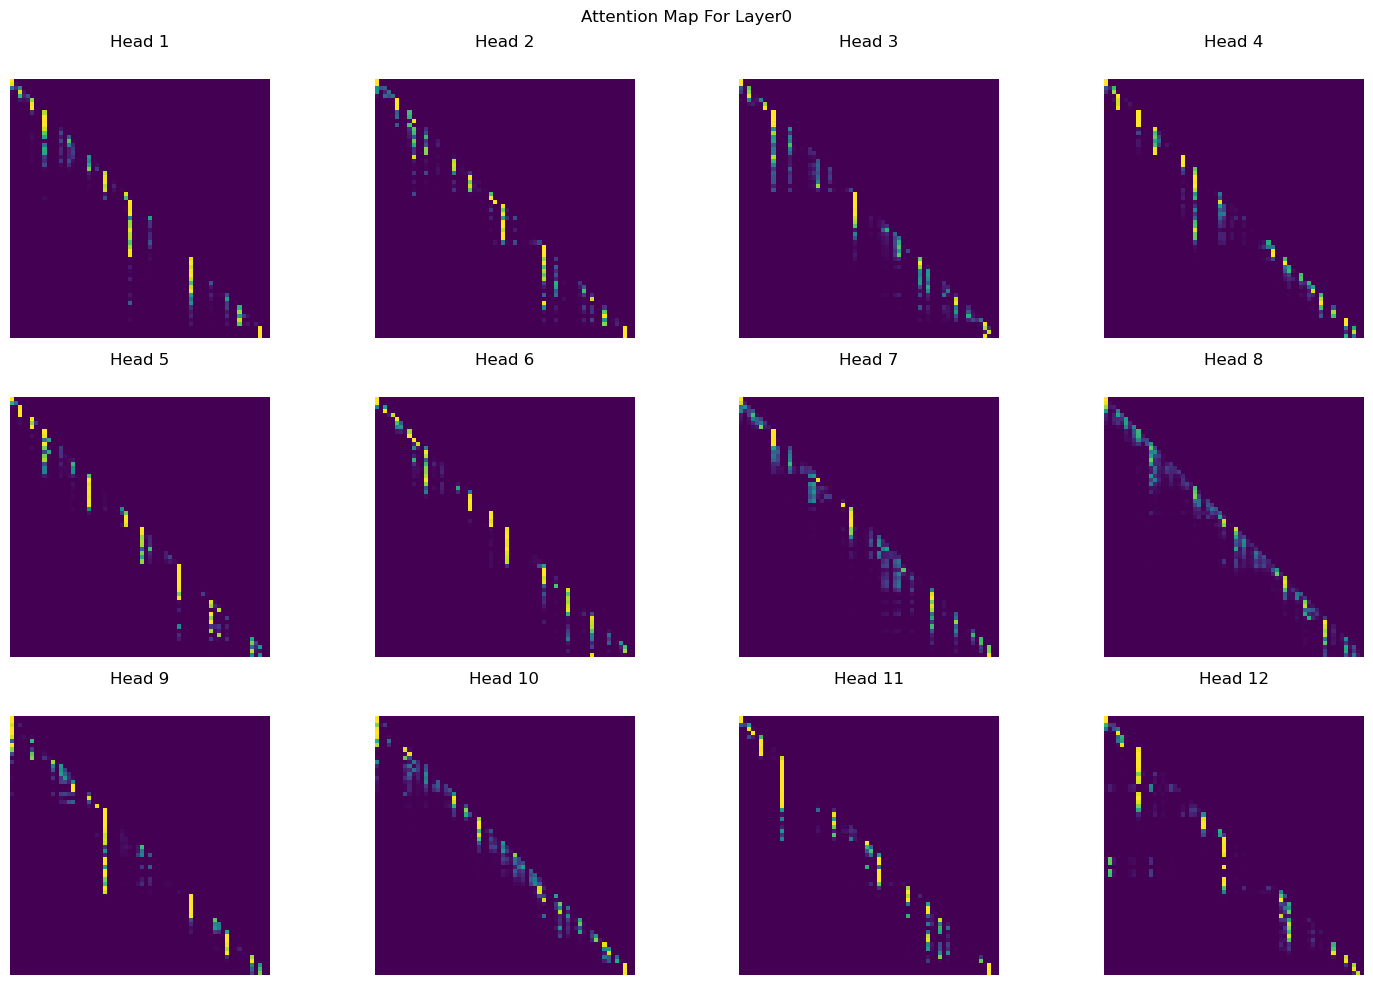

In [4]:
plot_attention(model, layer=0, batch_idx=0)